In [13]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

In [14]:
data=pd.read_csv("Company_Data.csv")

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [17]:
data1=data.copy()

In [19]:
import seaborn as sns

#### Checking for outliers

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


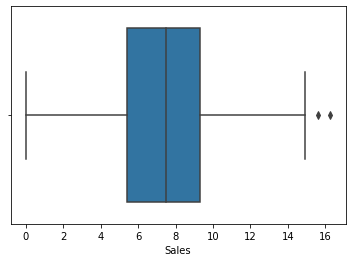

In [21]:
ax = sns.boxplot(data1['Sales'])

In [25]:
data1=pd.Series(data['Sales'])
s=[]
for i in data1:
    if i>9:
        s.append('good')
    
    else:
        s.append('bad')

print(s)

['good', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'bad'

In [27]:
data2=pd.DataFrame(s)
data3=pd.concat([df2,df],axis=1)
data3=data3.rename({0:'OUTPUT'},axis=1)
data3

,OUTPUT,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,good,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,good,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,good,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,bad,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,bad,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,good,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,bad,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,bad,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,bad,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [28]:
labelencoder = LabelEncoder()
df3.iloc[:, 7] = labelencoder.fit_transform(df3.iloc[:,7])
df3.iloc[:,-2]=labelencoder.fit_transform(df3.iloc[:,-2])
df3.iloc[:,-1]=labelencoder.fit_transform(df3.iloc[:,-1])
df3.iloc[:,0]=labelencoder.fit_transform(df3.iloc[:,0])


In [29]:
data3

,OUTPUT,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,good,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,good,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,good,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,bad,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,bad,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,good,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,bad,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,bad,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,bad,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [30]:
array=df3.values

In [31]:
X=array[:,2:10]
Y=array[:,0]

In [32]:
num_trees = 100
max_features = 5
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8375
